# Used cars price prediction

## Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Import Data

In [2]:
car_file_path = "data/classe_E.csv"
car_data = pd.read_csv(car_file_path) 
car_data.columns

Index(['Marque', 'Modele', 'Annee_modele', 'Km',
       'Date_premiere_mise_en_circulation', 'Carburant', 'Boite_vitesse',
       'Puissance', 'Critere_air', 'Couleur', 'Type_vehicule', 'Pays',
       'Prix_neuf', 'Prix_occasion'],
      dtype='object')

In [3]:
car_data.describe()

,Annee_modele,Km,Puissance,Prix_neuf,Prix_occasion
count,22.000000,22.000000,22.000000,22.0,22.000000
mean,2014.681818,133383.272727,126.363636,75000.0,46230.181818
std,1.249242,69976.496241,34.578476,0.0,5892.787873
min,2013.000000,34675.000000,90.000000,75000.0,34914.000000
25%,2014.000000,78451.500000,90.000000,75000.0,41446.500000
50%,2014.500000,127231.000000,120.000000,75000.0,44706.000000
75%,2016.000000,191467.250000,150.000000,75000.0,51412.500000
max,2016.000000,249866.000000,200.000000,75000.0,57050.000000


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Marque                             22 non-null     object 
 1   Modele                             22 non-null     object 
 2   Annee_modele                       22 non-null     int64  
 3   Km                                 22 non-null     int64  
 4   Date_premiere_mise_en_circulation  22 non-null     object 
 5   Carburant                          22 non-null     object 
 6   Boite_vitesse                      22 non-null     object 
 7   Puissance                          22 non-null     int64  
 8   Critere_air                        22 non-null     object 
 9   Couleur                            22 non-null     object 
 10  Type_vehicule                      22 non-null     object 
 11  Pays                               22 non-null     object 
 

In [5]:
car_data.head()

,Marque,Modele,Annee_modele,Km,Date_premiere_mise_en_circulation,Carburant,Boite_vitesse,Puissance,Critere_air,Couleur,Type_vehicule,Pays,Prix_neuf,Prix_occasion
0,Mercedes,Classe E,2014,129956,2014-01-21,Gaz,Manuelle,90,Euro 4,Rouge,Monospace,Japon,75000,44892.0
1,Mercedes,Classe E,2016,249866,2016-07-10,Hybride,Manuelle,110,Euro 1,Rouge,Berline,Italie,75000,41132.0
2,Mercedes,Classe E,2015,193598,2015-06-14,Diesel,Automatique,150,Euro 5,Gris,Break,USA,75000,42390.0
3,Mercedes,Classe E,2013,59780,2016-01-07,Gaz,Automatique,150,Euro 4,Rouge,Berline,Espagne,75000,49600.0
4,Mercedes,Classe E,2014,248175,2014-06-29,Diesel,Manuelle,90,Euro 4,Blanc,Break,France,75000,34914.0


In [6]:
# Select features
X = car_data.drop(['Prix_occasion'], axis=1)
y = car_data.Prix_occasion
# Select categorical columns
categorical_cols = [cname for cname in X.columns if
                    X[cname].dtype == "object"]
# Select numerical columns
numerical_cols = [cname for cname in X.columns if
                   X[cname].dtype in ['int64', 'float64']]
# Keep only the numerical and categorical columns
my_cols = categorical_cols + numerical_cols
X = X[my_cols]
# Check the number of missing values in each column
missing_values = X.isnull().sum()
# Keep only the columns with missing values
missing_values = missing_values[missing_values > 0]
# Print the columns with missing values
print(missing_values.index.tolist())

[]


# Preprocessing (more features): replacing text values by integer values

In [7]:
# Preprocessing to add 2 more columns : Carburant, Boite_vitesse
map_energy = {'Essence': 0, 'Gaz': 0, 'Diesel': 1, 'Hybride': 2, 'Electrique': 3}
car_data.Carburant = [map_energy[en]for en in car_data.Carburant]

map_gb = {'Manuelle': 0, 'Automatique': 1}
car_data.Boite_vitesse = [map_gb[gb]for gb in car_data.Boite_vitesse]

In [8]:
car_data.describe()

,Annee_modele,Km,Carburant,Boite_vitesse,Puissance,Prix_neuf,Prix_occasion
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.000000
mean,2014.681818,133383.272727,1.000000,0.318182,126.363636,75000.0,46230.181818
std,1.249242,69976.496241,0.872872,0.476731,34.578476,0.0,5892.787873
min,2013.000000,34675.000000,0.000000,0.000000,90.000000,75000.0,34914.000000
25%,2014.000000,78451.500000,0.000000,0.000000,90.000000,75000.0,41446.500000
50%,2014.500000,127231.000000,1.000000,0.000000,120.000000,75000.0,44706.000000
75%,2016.000000,191467.250000,2.000000,1.000000,150.000000,75000.0,51412.500000
max,2016.000000,249866.000000,2.000000,1.000000,200.000000,75000.0,57050.000000


In [9]:
# Filter rows with missing price values
filtered_car_data = car_data.dropna(axis=0)

In [10]:
# Choose target and features
y = filtered_car_data.Prix_occasion

car_features = ['Annee_modele',	'Km', 'Carburant', 'Boite_vitesse', 'Puissance']
X = filtered_car_data[car_features]

In [11]:
from sklearn.model_selection import train_test_split

def train_test_split_predict(model: object):
    # split data into training and validation data, for both features and target
    # The split is based on a random number generator. Supplying a numeric value to
    # the random_state argument guarantees we get the same split every time we
    # run this script.
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
    # Define model
    car_model = model()
    # Fit model
    car_model.fit(train_X, train_y)

    # get predicted prices on validation data
    val_predictions = car_model.predict(val_X)
    #print(mean_absolute_error(val_y, val_predictions))

    return {'model': car_model, 'val_y': val_y, 'val_pred': val_predictions}


In [12]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error, r2_score, mean_absolute_error

def evaluation(type: str, y, pred):
    # 'type' model evaluation
    print(f"\n{type} evaluation:")
    mse = mean_squared_error(y, pred)
    print(f'Mean Squared Error: {mse}')
    rmse = root_mean_squared_error(y, pred)
    print(f'Root Mean Squared Error: {rmse}')
    mae = mean_absolute_error(y, pred)
    print(f'Mean Absolute Error: {mae}')
    r2 = r2_score(y, pred)
    print(f'R^2 Score: {r2}')

# Vizualization

In [13]:
def viz(y, pred, title):
    # Graphical viz
    plt.scatter(y, pred, color='blue', label='Actual')
    plt.plot(y, pred, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

    # Numerical viz
    print("Real values      Predictions")
    [print("{:.1f}".format(i) + "          {:.1f}".format(j)) for (i, j) in zip(y, pred)]


# Custom pipeline

In [14]:
import matplotlib.pyplot as plt

def custom_pipeline(car_model: object, val_y, val_pred, y, title):

    # Predictions
    pred = car_model.predict(X)

    # Validation evaluation
    evaluation("Validation", val_y, val_pred)

    # Overall model evaluation
    evaluation("Overall", y, pred)

    # Visualize the predictions
    viz(y, pred, title)



# Two models comparison : Linear regression vs Decision tree regression

Linear Regression:


Validation evaluation:
Mean Squared Error: 809015.19599202
Root Mean Squared Error: 899.4527202649508
Mean Absolute Error: 842.7044256798303
R^2 Score: 0.9669247901984809

Overall evaluation:
Mean Squared Error: 511521.22940225597
Root Mean Squared Error: 715.207123428071
Mean Absolute Error: 605.0992613148198
R^2 Score: 0.9845678856302245


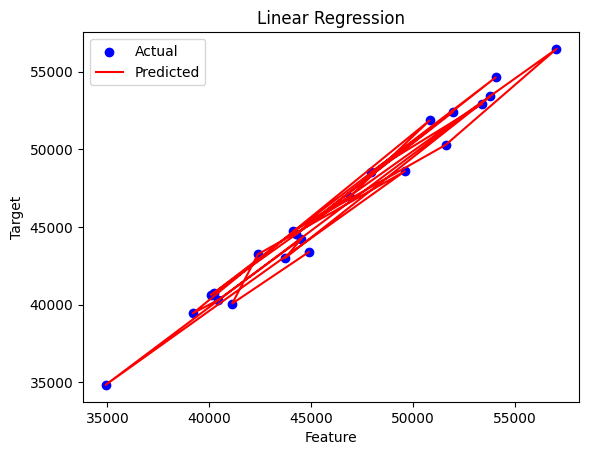

Real values      Predictions
44892.0          43388.5
41132.0          40071.5
42390.0          43237.8
49600.0          48590.6
34914.0          34829.6
53790.0          53411.7
43725.0          42996.5
44520.0          44234.2
40446.0          40308.0
39200.0          39439.7
50820.0          51865.7
46905.0          46961.9
44138.0          44759.2
51610.0          50291.1
57050.0          56471.6
40092.0          40631.9
40227.0          40756.1
54072.0          54646.0
44254.0          44532.6
51957.0          52397.8
47936.0          48524.8
53394.0          52930.0


In [15]:
# Linear regression
title = 'Linear Regression'
print(f"{title}:\n")
result = train_test_split_predict(LinearRegression)
car_model = result['model']
val_pred  = result['val_pred']
val_y     = result['val_y']

custom_pipeline(car_model, val_y, val_pred, y, title)

Decision Tree Regression:


Validation evaluation:
Mean Squared Error: 10896784.0
Root Mean Squared Error: 3301.0277187566903
Mean Absolute Error: 2800.0
R^2 Score: 0.5545035263275928

Overall evaluation:
Mean Squared Error: 2971850.1818181816
Root Mean Squared Error: 1723.9055025778478
Mean Absolute Error: 763.6363636363636
R^2 Score: 0.9103420752463216


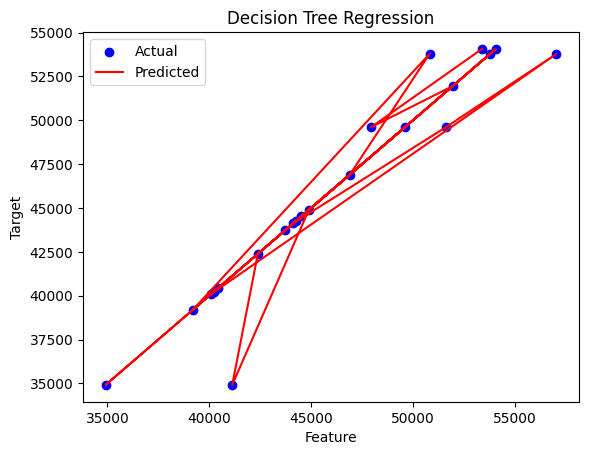

Real values      Predictions
44892.0          44892.0
41132.0          34914.0
42390.0          42390.0
49600.0          49600.0
34914.0          34914.0
53790.0          53790.0
43725.0          43725.0
44520.0          44520.0
40446.0          40446.0
39200.0          39200.0
50820.0          53790.0
46905.0          46905.0
44138.0          44138.0
51610.0          49600.0
57050.0          53790.0
40092.0          40092.0
40227.0          40227.0
54072.0          54072.0
44254.0          44254.0
51957.0          51957.0
47936.0          49600.0
53394.0          54072.0


In [16]:
# Decision tree regression
title = 'Decision Tree Regression'
print(f"{title}:\n")
result = train_test_split_predict(DecisionTreeRegressor)
car_model = result['model']
val_pred  = result['val_pred']
val_y     = result['val_y']

custom_pipeline(car_model, val_y, val_pred, y, title)